In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB   

In [6]:
# Read data
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")[['v1', 'v2']]
df.columns = ['label', 'text']
print(df)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


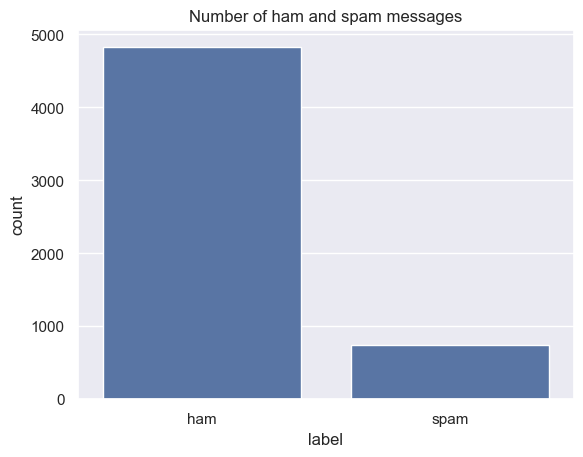

In [7]:
# Calculate the ham/spam count
#df.groupby('label').describe()
df.info()
sb.set()
sb.countplot(data = df, x= df["label"]).set_title("Number of ham and spam messages")
plt.show()

In [ ]:
# TODO: Use CountVectorizer to convert training and testing data into a matrix (based on train data)¶
# Step 1: Split data into Train and test data (70%/30%)
# Step 2: Fit the CountVectorizer with the training data such that we know the vocabulary.
#         Moreover, we count how frequently a word has been used. This will be used in the Multinomial naive bayes.
# Step 3: Transform the training and testing dataset into two separate matrices.
#         (One new column for every word in the messages and counts how often they have been used in each message)

# Step 1: Randomly split the data (Hint: Use "train_test_split" at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'],train_size=0.7,test_size=0.3)

# Step 2: Fit the CountVectorizer (Hint: Check the example at https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)   
vectorizer = CountVectorizer()
X_train_matrix = vectorizer.fit_transform(X_train)

# Step 3: Transform the training and testing dataset into two separate matrices (Hint: Check https://scikit-learn.org/0.15/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)
X_test_matrix = vectorizer.transform(X_test)

In [9]:
# TODO: Use MultinomialNB() to train a spam filter with the training dataset X_train, y_train
# Hint: Check the example at https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.MultinomialNB.html
model = MultinomialNB()
model.fit(X_train_matrix, y_train)

MultinomialNB()

In [10]:
# TODO: Test the spam filter by using the testing dataset X_test, y_test
y_pred = model.predict(X_test_matrix)

Test Accuracy: 0.9844497608
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1436
        spam       0.96      0.92      0.94       236

    accuracy                           0.98      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.98      0.98      1672



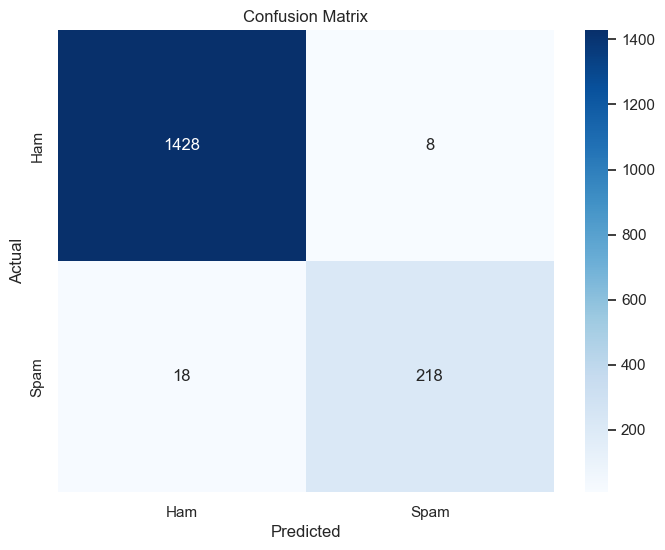

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.10f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
def evaluate_with_prior(prior=None, train_size=0.7):
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], train_size=train_size, random_state=42)
    
    vectorizer = CountVectorizer()
    X_train_matrix = vectorizer.fit_transform(X_train)
    X_test_matrix = vectorizer.transform(X_test)
    
    model = MultinomialNB(class_prior=prior)
    model.fit(X_train_matrix, y_train)
    
    y_pred = model.predict(X_test_matrix)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with prior {prior} and train_size {train_size}: {accuracy:.4f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Prior
# Uniform prior
evaluate_with_prior(prior=None, train_size=0.7)
# 50% ham/50% spam prior
evaluate_with_prior(prior=[0.50, 0.50], train_size=0.7)
# 90% ham/10% spam prior
evaluate_with_prior(prior=[0.90, 0.10], train_size=0.7)

# Dataset Partition
# 80%/20% partition
evaluate_with_prior(prior=None, train_size=0.8)
# 60%/40% partition
evaluate_with_prior(prior=None, train_size=0.6)

Test Accuracy with prior None and train_size 0.7: 0.9821
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.97      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Test Accuracy with prior [0.5, 0.5] and train_size 0.7: 0.9767
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.91      0.91      0.91       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Test Accuracy with prior [0.9, 0.1] and train_size 0.7: 0.9827
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      